# New York House Price Prediction
dataset: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market

## Variables
* BROKERTITLE: Title of the broker
* TYPE: Type of the house
* PRICE: Price of the house
* BEDS: Number of bedrooms
* BATH: Number of bathrooms
* PROPERTYSQFT: Square footage of the property
* ADDRESS: Full address of the house
* STATE: State of the house
* MAIN_ADDRESS: Main address information
* ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
* LOCALITY: Locality information
* SUBLOCALITY: Sublocality information
* STREET_NAME: Street name
* LONG_NAME: Long name
* FORMATTED_ADDRESS: Formatted address
* LATITUDE: Latitude coordinate of the house
* LONGITUDE: Longitude coordinate of the house

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset

df = pd.read_csv('NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [4]:
# Null values

df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [5]:
# Broker Unique Values

print('num of unique vals:',len(df['BROKERTITLE'].unique()))

print(df['BROKERTITLE'].unique())

num of unique vals: 1036
['Brokered by Douglas Elliman  -111 Fifth Ave' 'Brokered by Serhant'
 'Brokered by Sowae Corp' ... 'Brokered by Fine Choice Realty Inc'
 'Brokered by Silverside Realty LLC'
 'Brokered by New York Way Real Estate Corp']


In [6]:
# Count of Houses that had been brokered or not

broker_count = 0
no_broker = 0

for txt in df['BROKERTITLE']:
    if txt.startswith('Brokered by'):
        broker_count += 1
    else:
        no_broker += 1
        
print(broker_count, no_broker)

4763 38


In [7]:
# Make categorical variable ---> brokered = 1, not_brokered = 0

broks = []

for brok in df['BROKERTITLE']:
    if brok.startswith('Brokered by'):
        broks.append(1)
    else:
        broks.append(0)

df['BROKERED'] = broks

df['BROKERED'].unique() # counts: 1 -> 4763, 0 -> 38    IMBALANCED CLASS

array([1, 0], dtype=int64)

In [8]:
# I use it for further location analysis
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKERED
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,1
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,1
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,1
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,1
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,1


In [9]:
# Observe locality variables' unique values
# I want to reduce such variables to one variable in order to make analysis clearer
# I don't include other variables because of their many unique values

print('Locality:', df['LOCALITY'].unique())
print('Sublocality:', df['SUBLOCALITY'].unique())
print('Adm Area:', df['ADMINISTRATIVE_AREA_LEVEL_2'].unique())

Locality: ['New York' 'New York County' 'The Bronx' 'Kings County' 'Bronx County'
 'Queens County' 'Richmond County' 'United States' 'Brooklyn' 'Queens'
 'Flatbush']
Sublocality: ['Manhattan' 'New York County' 'Richmond County' 'Kings County' 'New York'
 'East Bronx' 'Brooklyn' 'The Bronx' 'Queens' 'Staten Island'
 'Queens County' 'Bronx County' 'Coney Island' 'Brooklyn Heights'
 'Jackson Heights' 'Riverdale' 'Rego Park' 'Fort Hamilton' 'Flushing'
 'Dumbo' 'Snyder Avenue']
Adm Area: ['New York County' 'United States' 'New York' 'Bronx County' '11214'
 '10301' '10309' '10303' '11234' '11414' '10310' '10003' '11417' '10304'
 'Kings County' '10463' 'Queens County' '10017' '10306' '10471' '11229'
 '10312' '11412' '10465' 'Brooklyn' '10002' '10466' '11237' '11218']


In my opinion out of these variables, sublocality can be the most useful, however latitude-longitude combination can also be used for the location analysis. 

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

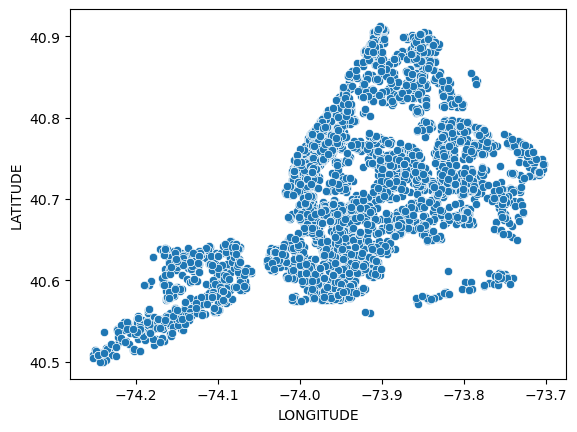

In [10]:
# Check out lat-long variables (Giving us approx map of new york)

sns.scatterplot(data = df, x = 'LONGITUDE', y = 'LATITUDE')

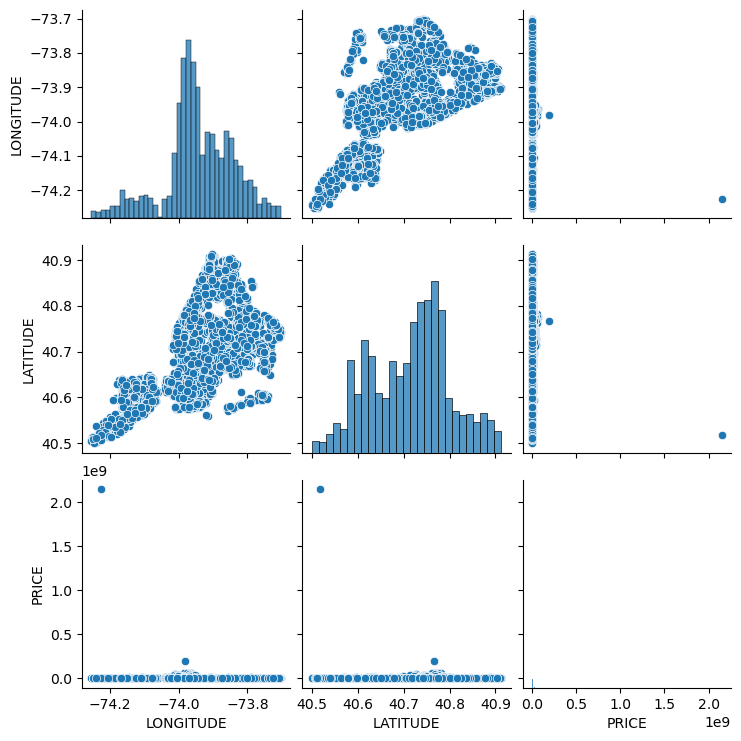

In [11]:
# long-lat-price scatterplots

sns.pairplot(df[['LONGITUDE','LATITUDE','PRICE']])

Now we know price has some outliers affecting our dataset negatively, so lets fix that. 

*for location variable, I think long-lat will be enough*

<Axes: xlabel='PRICE'>

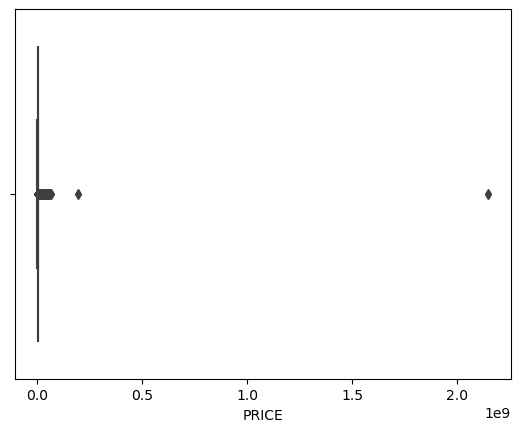

In [12]:
# Price variable distribution

sns.boxplot(data = df, x = 'PRICE')

In [13]:
# Remove Outliers with IQR method

Q1 = df['PRICE'].quantile(0.25) 
Q3 = df['PRICE'].quantile(0.75) 
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

outlier_index = df[(df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)].index 

len(df[(df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)])

559

In [14]:
# Drop outliers

data = df.drop(outlier_index, axis = 0).reset_index(drop = True)
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKERED
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,1
1,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,1
2,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,1
3,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,1
4,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777,1


<Axes: ylabel='Density'>

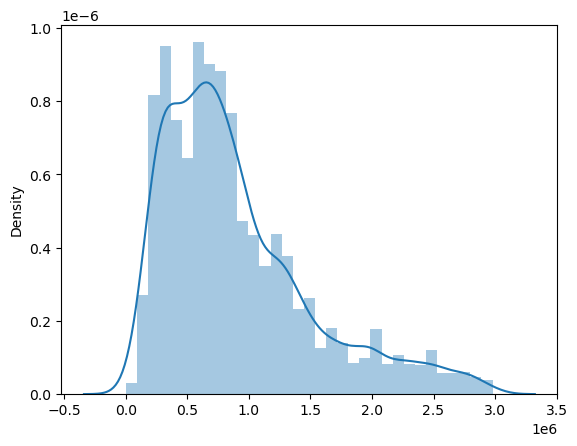

In [15]:
# Check Price distribution

sns.distplot(x = data['PRICE'])

<Axes: xlabel='PRICE'>

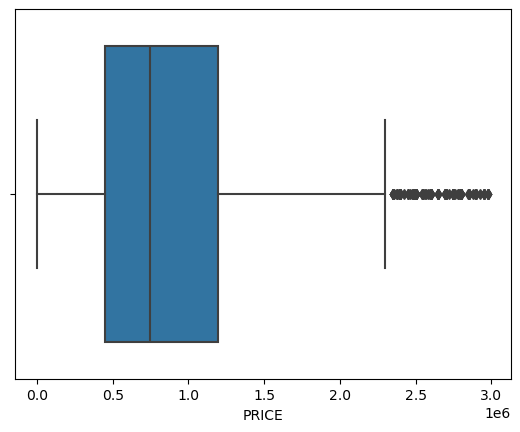

In [16]:
# Boxplot of price

sns.boxplot(data = data, x = 'PRICE')

Extreme outliers have been removed

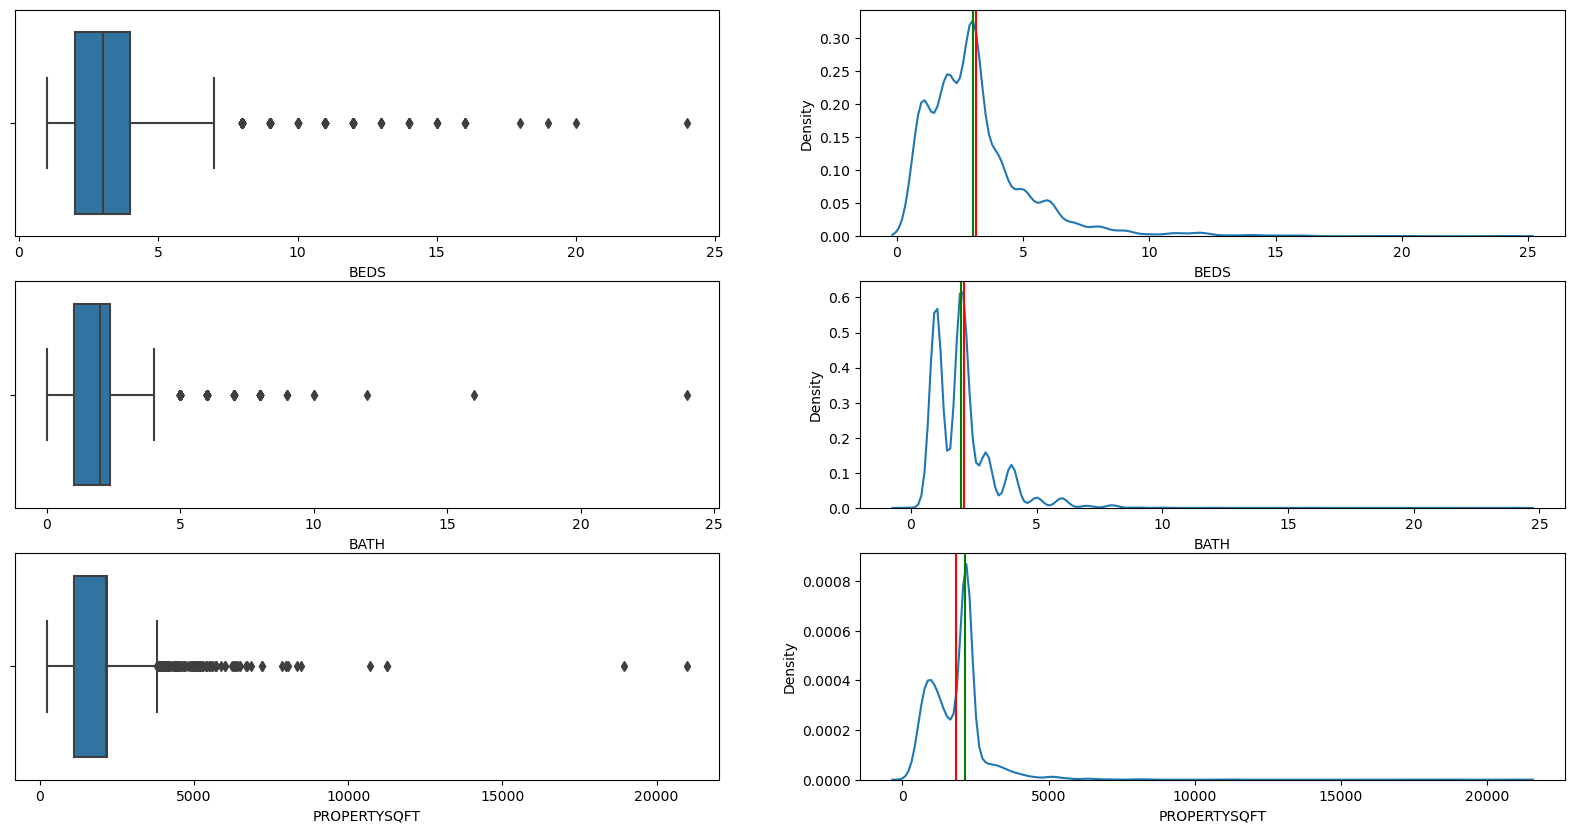

In [17]:
# Observe numerical variables 

# Create figure to plot on and introduce iteration variable
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,10))
i = 0
columns = ['BEDS','BATH','PROPERTYSQFT']

# Loop to plot all the variables boxplot and kdeplot
for column in columns:
    
    # Boxplot
    sns.boxplot(data = data, x = column, ax = ax[i,0])
    
    # KDEplot
    sns.kdeplot(data = data, x = column, ax = ax[i,1])
    
    # Mean and Median on KDEplot, mean <-> red, median <-> green
    ax[i,1].axvline(x = data[column].mean(), color = 'red') 
    ax[i,1].axvline(x = data[column].median(), color = 'green')
    
    # update iteration var
    i += 1

They are skewed to the right

In [18]:
# Remove outliers for these features ['BEDS', 'BATH', 'PROPERTYSQFT'] (IQR method)

indices = []
variables = ['BEDS', 'BATH', 'PROPERTYSQFT']

for variable in variables:
    
    q1 = data[variable].quantile(.25) 
    q3 = data[variable].quantile(.75) 
    iqr = q3 - q1 
    
    low = q1 - 1.5 * iqr 
    up = q3 + 1.5 * iqr 
    
    out_index = list(data[(data[variable] < low) | (data[variable] > up)].index) 
    
    indices.append(out_index) 
    
all_outliers = pd.Series(indices[0]+indices[1]+indices[2])
final_outlier_indices = all_outliers.drop_duplicates()

new_df = data.drop(list(final_outlier_indices), axis = 0)
new_df = new_df.reset_index(drop = True)
new_df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKERED
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,1
1,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,1
2,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,1
3,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777,1
4,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.0,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,1


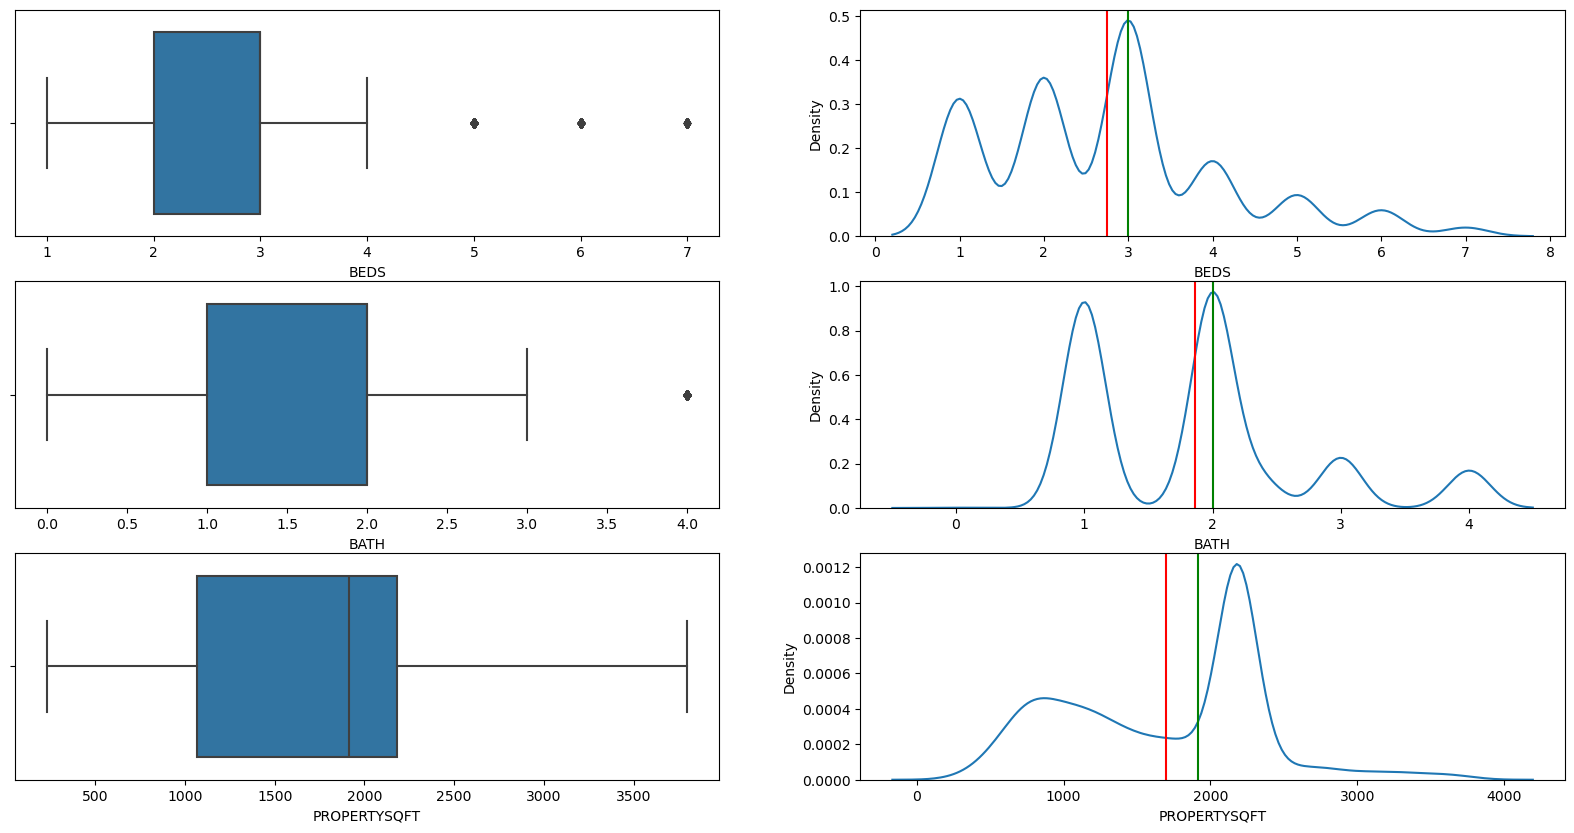

In [19]:
# Observe numerical variables (AGAIN)

# Create figure to plot on and introduce iteration variable
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,10))
i = 0
columns = ['BEDS','BATH','PROPERTYSQFT']

# Loop to plot all the variables boxplot and kdeplot
for column in columns:
    
    # Boxplot
    sns.boxplot(data = new_df, x = column, ax = ax[i,0])
    
    # KDEplot
    sns.kdeplot(data = new_df, x = column, ax = ax[i,1])
    
    # Mean and Median on KDEplot, mean <-> red, median <-> green
    ax[i,1].axvline(x = new_df[column].mean(), color = 'red') 
    ax[i,1].axvline(x = new_df[column].median(), color = 'green')
    
    # update iteration var
    i += 1

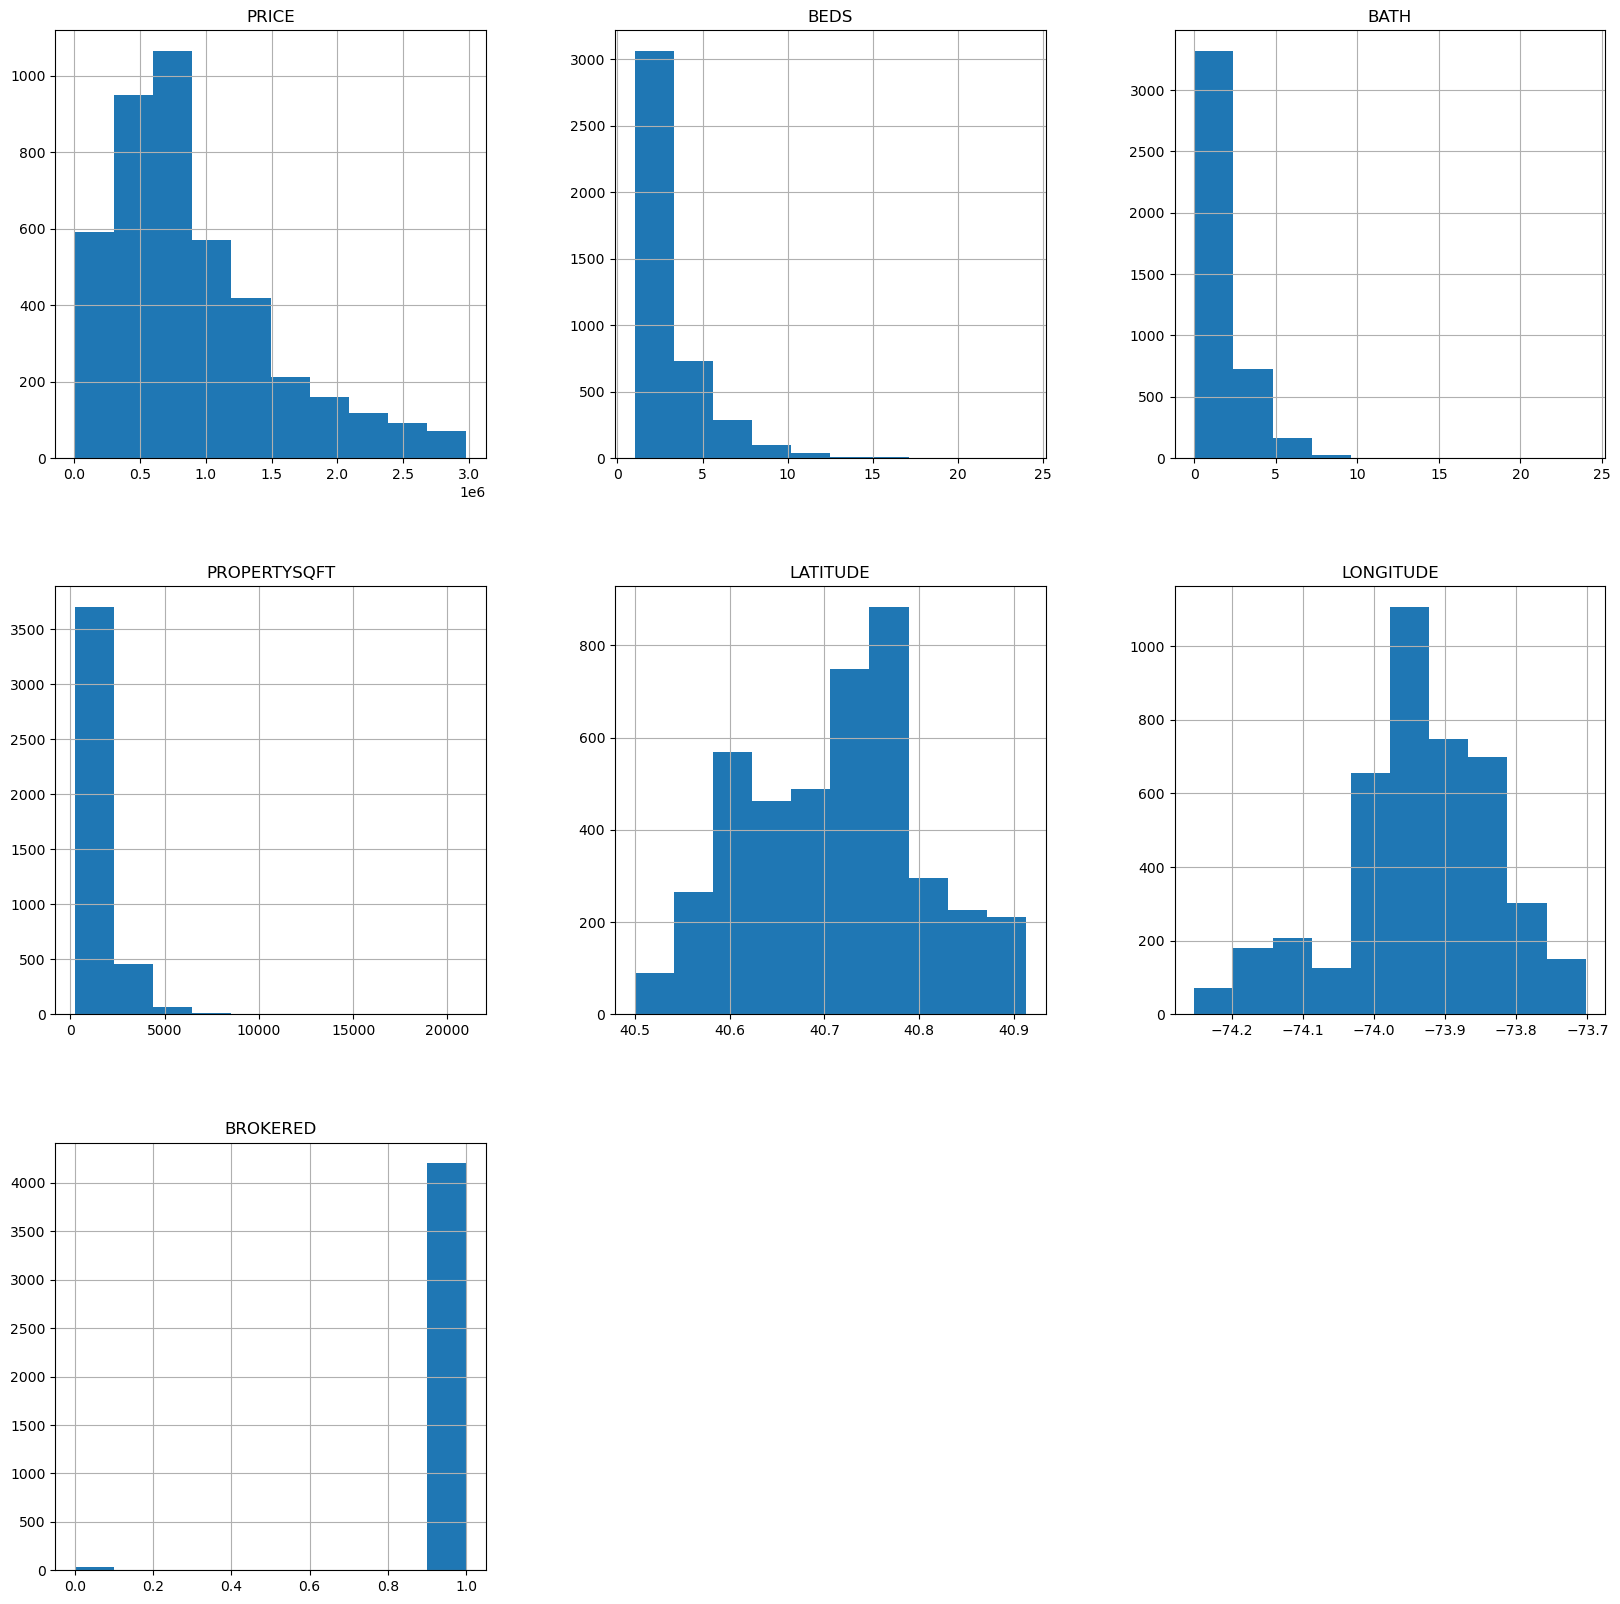

In [20]:
# Histogram for numerical variables
data.hist(figsize = (20,20));

For property size in squared foot, there can be seen one unique value that repeats itself many times

In [21]:
# Check the value that is very frequent in CONTINUOUS variable (quite strange)

print('VALUE : ',new_df['PROPERTYSQFT'].value_counts().idxmax())
print('OCCURANCE : ',new_df['PROPERTYSQFT'].value_counts().max())

VALUE :  2184.207862
OCCURANCE :  1387


<Axes: >

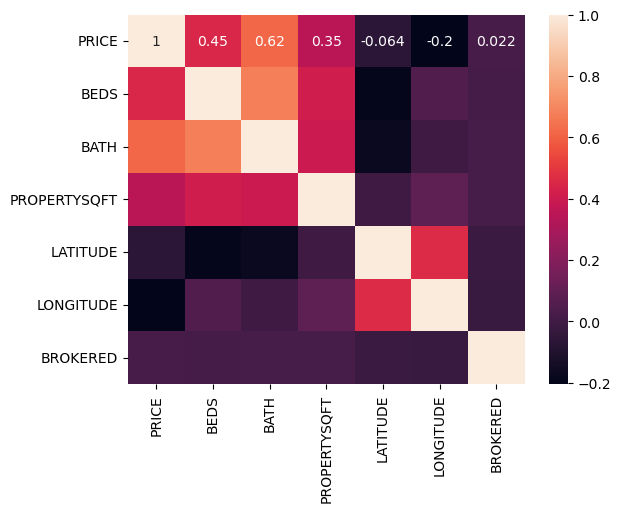

In [22]:
# Corrplot

sns.heatmap(new_df.select_dtypes(include = 'number').corr('spearman'), annot = True)

Correlation shows us some logical and useful correlation between variables

**ML**

In [23]:
# Feature and Label

X = new_df[['TYPE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE','BROKERED']]
y = new_df['PRICE']

In [24]:
# train_test_split, dummy variables and scaling

# Dummies
X = pd.get_dummies(X, drop_first = True)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
# Function for fitting model and evaluation + GridSearch for optimizing hyperparameters

# Imports
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Metrics
maes = []
mses = []
rmses = []

# Function 
def reg_model(model, param_grid):
    
    # Ultimate model with grid search and cross validation
    grid_model = GridSearchCV(model, param_grid)
    
    # Fit model
    grid_model.fit(scaled_X_train, y_train)
    print(grid_model.best_params_)
    
    # Predictions
    preds = grid_model.predict(scaled_X_test)
    
    # Evaluate Model
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    
    print('Mean Absolute Error :',mae)
    print('Mean Squared Error : ', mse)
    print('Root Mean Squared Error :',rmse)
    
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)

In [26]:
# K Nearest Neighbors

reg_model(KNeighborsRegressor(), {'n_neighbors' : range(1,21)})

{'n_neighbors': 7}
Mean Absolute Error : 242575.0408422581
Mean Squared Error :  133529208017.71513
Root Mean Squared Error : 365416.4856950424


In [27]:
# Gradient Boosting

reg_model(GradientBoostingRegressor(random_state = 101), {'max_depth' : [3,4,5],
                                                          'n_estimators' : [100,500,1000],
                                                          'learning_rate' : [0.01, 0.1, 0.5, 1]})

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Mean Absolute Error : 194805.8726083148
Mean Squared Error :  86902145448.30093
Root Mean Squared Error : 294791.69840465474


In [28]:
# Support Vector Machines

reg_model(SVR(), {'kernel' : ['linear', 'poly', 'rbf'],
                  'C' : [0.1, 0.5, 1, 10, 100],
                  'degree' : [2,3,4]})

{'C': 100, 'degree': 2, 'kernel': 'linear'}
Mean Absolute Error : 336029.2631809449
Mean Squared Error :  263624290022.11032
Root Mean Squared Error : 513443.56069787295


In [29]:
# Random Forest 

reg_model(RandomForestRegressor(random_state = 101), {'n_estimators' : [64, 100, 128],
                                                      'max_depth' : [3, 4, 5],
                                                      'max_features' : [len(X_train.columns)/3, 'sqrt', 'log2']})

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
Mean Absolute Error : 272739.17494192906
Mean Squared Error :  146304055029.72122
Root Mean Squared Error : 382497.13074704394


In [30]:
# Compare Performances

models = ['KNN', 'Gradient Boosting', 'SVR', 'Random Forest']

pd.DataFrame({'Model' : models,
              'MAE' : maes,
              'MSE' : mses,
              'RMSE' : rmses})

,Model,MAE,MSE,RMSE
0,KNN,242575.040842,1.335292e+11,365416.485695
1,Gradient Boosting,194805.872608,8.690215e+10,294791.698405
2,SVR,336029.263181,2.636243e+11,513443.560698
3,Random Forest,272739.174942,1.463041e+11,382497.130747


In [31]:
# Final model based on performances and grid-search

final_model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5, n_estimators  = 1000)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

In [32]:
# Feature Importances

importances = final_model.feature_importances_
features = X_train.columns

importances_df = pd.DataFrame({'Features' : features,
                               'Importances' : importances})

importances_df = importances_df.sort_values(by = 'Importances')

importances_df

,Features,Importances
14,TYPE_Mobile house for sale,0.000000
5,BROKERED,0.000029
8,TYPE_Condop for sale,0.000073
9,TYPE_Contingent,0.000084
10,TYPE_For sale,0.000356
16,TYPE_Pending,0.000837
11,TYPE_Foreclosure,0.001176
6,TYPE_Coming Soon,0.001861
15,TYPE_Multi-family home for sale,0.002550
13,TYPE_Land for sale,0.002941


<Axes: xlabel='Features', ylabel='Importances'>

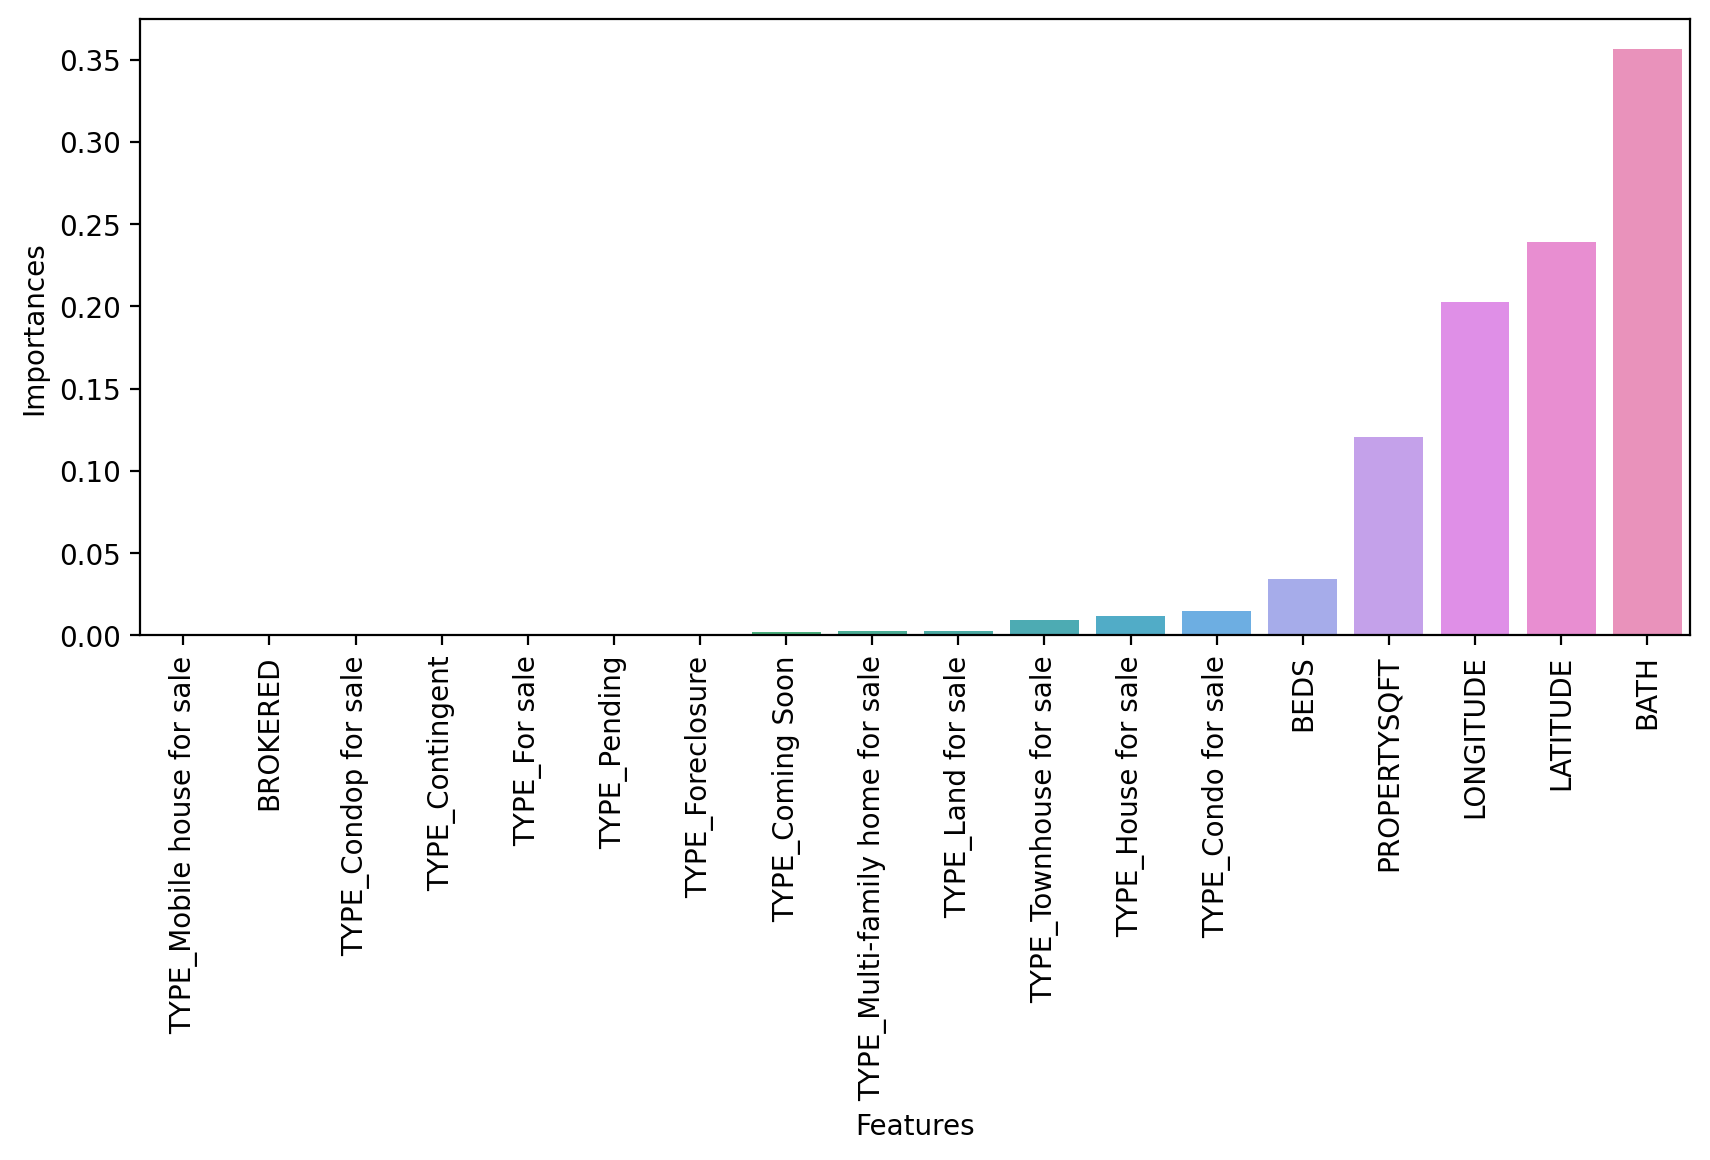

In [33]:
# Plot of Feature Importances

plt.figure(figsize = (10,4), dpi = 200)
plt.xticks(rotation = 90)
sns.barplot(x = 'Features', y = 'Importances', data = importances_df)

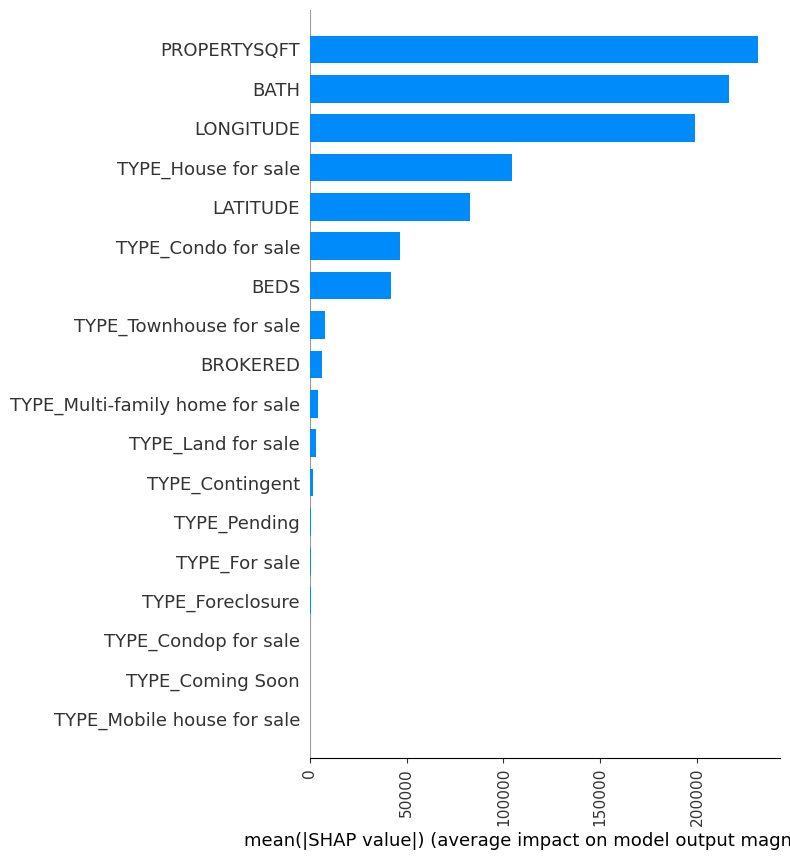

In [34]:
# SHAP
import shap

# Explainer 
explainer = shap.TreeExplainer(final_model)

# Shap values
shap_values = explainer.shap_values(scaled_X_test)

# Shap Plot
plt.xticks(rotation = 90)
shap.summary_plot(shap_values, scaled_X_test, feature_names = X_train.columns, plot_type = 'bar', )


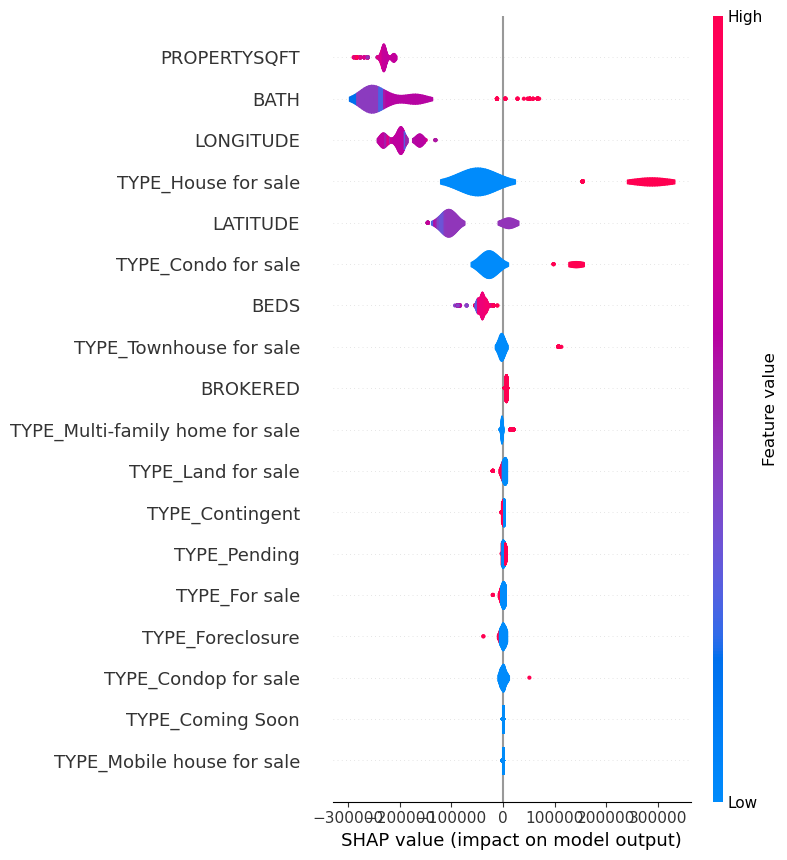

In [43]:
shap.summary_plot(shap_values, scaled_X_test, feature_names = X_train.columns, plot_type = 'violin')